In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# !git clone https://github.com/camigutie/DS4002-Project2

Cloning into 'DS4002-Project2'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 74 (delta 26), reused 28 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 530.19 KiB | 14.33 MiB/s, done.
Resolving deltas: 100% (26/26), done.


## Load Data



In [5]:
import pandas as pd
df = pd.read_csv('../DATA/established.csv')
display(df.head())

,Unnamed: 0,observation_date,cpi,mcpi,hei
0,0,2000-12-31,3.43602,4.19772,NaN
1,1,2001-01-31,3.72120,4.53834,7.26577
2,2,2001-02-28,3.52941,4.60039,7.26577
3,3,2001-03-31,2.98246,4.54016,7.26577
4,4,2001-04-30,3.21826,4.64396,7.26577


## Data Exploration

In [6]:
relevant_cols = ['observation_date', 'cpi', 'mcpi', 'hei']

# Convert 'observation_date'
if not pd.api.types.is_datetime64_any_dtype(df['observation_date']):
    df['observation_date'] = pd.to_datetime(df['observation_date'])

# Check for missing values
print("DataFrame shape:", df.shape)
print("\nMissing values in relevant columns:\n", df[relevant_cols].isnull().sum())

# Confirm time range
print("\nTime range:")
print("Minimum date:", df['observation_date'].min())
print("Maximum date:", df['observation_date'].max())

# Summary statistics
print("\nSummary statistics for numerical columns:")
display(df[['cpi', 'mcpi', 'hei']].describe())

DataFrame shape: (290, 5)

Missing values in relevant columns:
 observation_date     0
cpi                  0
mcpi                 0
hei                 49
dtype: int64

Time range:
Minimum date: 2000-12-31 00:00:00
Maximum date: 2025-01-31 00:00:00

Summary statistics for numerical columns:


,cpi,mcpi,hei
count,290.000000,290.000000,241.000000
mean,2.550887,3.274017,3.316214
std,1.786596,1.220335,1.624991
min,-1.958760,-1.423390,0.827310
25%,1.550920,2.545408,2.207690
50%,2.234795,3.387500,2.880000
75%,3.244623,4.242953,4.662670
max,8.999300,5.991260,7.265770


## Data preparation

In [7]:
# Fill missing 'hei' values with the mean
df['hei'].fillna(df['hei'].mean(), inplace=True)

display(df.head())

/var/folders/ll/gtcbtj4n6mjf4mwvq3711yw40000gn/T/ipykernel_3563/940853526.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hei'].fillna(df['hei'].mean(), inplace=True)


,Unnamed: 0,observation_date,cpi,mcpi,hei
0,0,2000-12-31,3.43602,4.19772,3.316214
1,1,2001-01-31,3.72120,4.53834,7.265770
2,2,2001-02-28,3.52941,4.60039,7.265770
3,3,2001-03-31,2.98246,4.54016,7.265770
4,4,2001-04-30,3.21826,4.64396,7.265770


**Reasoning**:
I need to fix the warning from the previous code block and complete the subtask.



## Pearson Correlation Coefficients

##### Calculate the Pearson correlation coefficients between CPI variables.


In [8]:
# Calculate Pearson correlation coefficients
correlation_cpi_mcpi = df['cpi'].corr(df['mcpi'])
correlation_hei_cpi = df['hei'].corr(df['cpi'])
correlation_hei_mcpi = df['hei'].corr(df['mcpi'])

# Print the correlation coefficients
print(f"Correlation between CPI and Medical Care CPI: {correlation_cpi_mcpi}")
print(f"Correlation between Health Expenditures Price Index and CPI: {correlation_hei_cpi}")
print(f"Correlation between Health Expenditures Price Index and Medical Care CPI: {correlation_hei_mcpi}")

Correlation between CPI and Medical Care CPI: 0.012486224324373636
Correlation between Health Expenditures Price Index and CPI: 0.08205895858575578
Correlation between Health Expenditures Price Index and Medical Care CPI: 0.2804050104961945


# Linear Regression Model

## 1) Split Data
Training and testing sets for the linear regression model


In [9]:
from sklearn.model_selection import train_test_split

# Linear Regression Data Splitting
X = df[['hei']]
y = df['mcpi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SARIMA Data Preparation
df_sarima = df[['observation_date', 'cpi', 'mcpi']].copy()
df_sarima['observation_date'] = pd.to_datetime(df_sarima['observation_date'])
df_sarima = df_sarima.set_index('observation_date')

## 2) Model training

Train a linear regression model to predit Medical Care CPI based on the Health Expenditures Price Index.


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

## 3) Model evaluation

##### Evaluate the performance of the trained linear regression model using R-squared, RMSE, and MAE. .


In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Print the model's coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

R-squared: 0.01950253221303533
Root Mean Squared Error (RMSE): 1.3308023738193449
Mean Absolute Error (MAE): 0.964336795215285
Model Coefficients: [0.2431609]
Model Intercept: 2.490571563273336


# Trend Forecasting

##### Train SARIMA models for Headline CPI (cpi) and Medical Care CPI ('mcpi'). We will use pmdarima to automatically find the optimal parameters for the model


In [12]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.4/630.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.8 MB/s eta 0:00:00a 0:00:01


In [13]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA model for 'cpi'
sarima_cpi_model = pm.auto_arima(df_sarima['cpi'],
                                 seasonal=True, m=12,
                                 start_p=0, start_q=0,
                                 max_p=5, max_q=5,
                                 max_d=2, max_D=2,
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)

# Train SARIMA model for 'mcpi'
sarima_mcpi_model = pm.auto_arima(df_sarima['mcpi'],
                                  seasonal=True, m=12,
                                  start_p=0, start_q=0,
                                  max_p=5, max_q=5,
                                  max_d=2, max_D=2,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=375.288, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=228.887, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=373.291, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=315.294, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=178.201, Time=0.86 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=249.571, Time=0.37 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=170.293, Time=0.84 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=216.785, Time=0.40 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=165.918, Time=

/var/folders/ll/gtcbtj4n6mjf4mwvq3711yw40000gn/T/ipykernel_3563/1580335042.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(forecast_index_cpi[i-1], forecast_cpi[i-1], marker='o', color='red', label=f'{i/12} year forecast')
/var/folders/ll/gtcbtj4n6mjf4mwvq3711yw40000gn/T/ipykernel_3563/1580335042.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(forecast_index_mcpi[i-1], forecast_mcpi[i-1], marker='o', color='green', label=f'{i/12} year forecast')


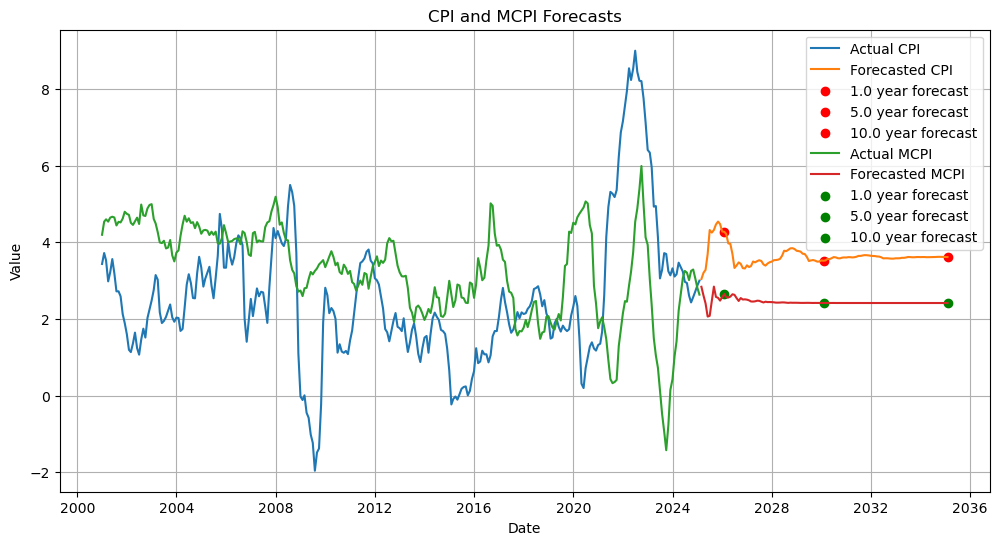

In [14]:
# Trend Forecast: 1, 5, 10 years
future_steps = [12, 60, 120]

# Forecast CPI
forecast_cpi = sarima_cpi_model.predict(n_periods=max(future_steps))
forecast_index_cpi = pd.date_range(start=df_sarima.index[-1], periods=max(future_steps) + 1, freq='MS')[1:]

# Forecast MCPI
forecast_mcpi = sarima_mcpi_model.predict(n_periods=max(future_steps))
forecast_index_mcpi = pd.date_range(start=df_sarima.index[-1], periods=max(future_steps) + 1, freq='MS')[1:]


# Visualization
plt.figure(figsize=(12, 6))

plt.plot(df_sarima.index, df_sarima['cpi'], label='Actual CPI')
plt.plot(forecast_index_cpi, forecast_cpi, label='Forecasted CPI')
for i in future_steps:
  plt.scatter(forecast_index_cpi[i-1], forecast_cpi[i-1], marker='o', color='red', label=f'{i/12} year forecast')

plt.plot(df_sarima.index, df_sarima['mcpi'], label='Actual MCPI')
plt.plot(forecast_index_mcpi, forecast_mcpi, label='Forecasted MCPI')
for i in future_steps:
  plt.scatter(forecast_index_mcpi[i-1], forecast_mcpi[i-1], marker='o', color='green', label=f'{i/12} year forecast')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('CPI and MCPI Forecasts')
plt.legend()
plt.grid(True)
plt.savefig('../OUTPUT/trends.png')
plt.show()